## 데이타 그룹연산 Group by

In [48]:
import numpy as np
import pandas as pd 

from pandas import Series, DataFrame
import matplotlib.pyplot as plt


In [49]:
'''
    groupby 는 통계 자료에서 굉장히 많이 사용한다. 
    그룹핑 시켜서 데이타의 합을 구하거나 평균치를 구하거나 등등
'''

'\n    groupby 는 통계 자료에서 굉장히 많이 사용한다. \n    그룹핑 시켜서 데이타의 합을 구하거나 평균치를 구하거나 등등\n'

In [50]:
np.random.seed(100)
df1 = DataFrame({
    'Gender':['Female','Male','Female','Male','Female','Male','Female','Female'],
    'Smoking':['Smoker','Smoker','Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Smoker'],
    'CountA':np.random.randint(1,10,8),
    'CountB':np.random.randint(1,10,8)  
})

df1

,Gender,Smoking,CountA,CountB
0,Female,Smoker,9,6
1,Male,Smoker,9,3
2,Female,Smoker,4,3
3,Male,Non-Smoker,8,3
4,Female,Non-Smoker,8,2
5,Male,Non-Smoker,1,1
6,Female,Non-Smoker,5,9
7,Female,Smoker,3,5


In [51]:
df1.groupby('Gender') # DataFrameGroupBy object 가 리턴 된다. 따라서 안의 자료를 보려면 통계함수를 사용해야함 


In [52]:
# groupby 함수로 그룹핑을 했으면 반드시 통계함수를 적용해야한다. 
# Smoking 은 Numeric한 컬럼이 아니라서 sum() 함수의 적용받지못한다. 
df1.groupby('Gender').sum()


,CountA,CountB
Gender,,
Female,29,25
Male,18,7


In [53]:
df1.groupby('Gender').max()


,Smoking,CountA,CountB
Gender,,,
Female,Smoker,9,9
Male,Smoker,9,3


In [54]:
# 그룹핑을 할 떄 2개이상 컬럼 가능 
df1.groupby(['Gender','Smoking']).sum()


CountA  CountB
Gender Smoking                   
Female Non-Smoker      13      11
       Smoker          16      14
Male   Non-Smoker       9       4
       Smoker           9       3

In [55]:
df1.groupby(['Gender'])[['CountA']].sum() #이쁘게 변환 
df1.groupby(['Gender'])['CountA'].sum() #시리즈로 반환 

df1.groupby(['Gender'])['CountA'].agg(['sum','mean'])

,sum,mean
Gender,,
Female,29,5.8
Male,18,6.0


In [56]:
df1.groupby(['Gender'])[['CountA']].sum()
df1.groupby(['Gender'])['CountA'].agg(['sum']) 


,sum
Gender,
Female,29
Male,18


In [57]:
# agg 는 aggregation의 약자, 여러개의 함수를 동시에 사용해서 그룹핑 할 수 있다. 
df1.groupby('Gender')['CountA'].agg(['sum','mean','count'])

,sum,mean,count
Gender,,,
Female,29,5.8,5
Male,18,6.0,3


## 실전데이타 응용하기

In [58]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


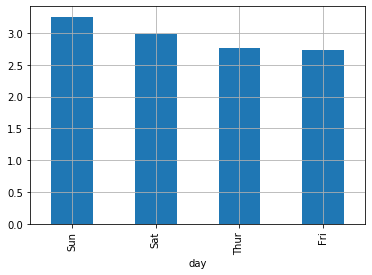

In [59]:
# day 라는 컬럼을 기준으로 요일별 팁 평균 
# 1
tipdf.groupby('day')['tip'].mean()

# 2
tip_group = tipdf.groupby('day')
tip_group['tip'].mean()

# 3 
tip_group['tip'].mean().sort_values(ascending=False)

# 4
tip_group['tip'].mean().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.show()

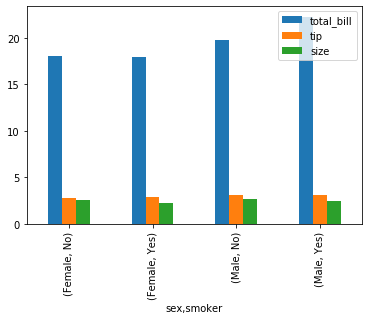

In [60]:
# 이중으로 그룹핑 가능하다. (성별 그룹핑 후 ) 나중에 다시 흡연.비흡연으로 그룹핑 
tip_group2= tipdf.groupby(['sex','smoker'])
tip_group2.mean().plot(kind='bar')
plt.show()


## 알아두어야할 함수

In [61]:
'''
    1. unique()
    중복된 것은 걸러버리고 중복되자않은 값만 출력
    SQL 에서 distinct와 동일한 기능
    
'''
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [62]:
'''
    2. describe()
    데이타에 대한 간단한 설명
    간단한 통계자료를 내준다. 
    숫자로서 가능한 데이타만 출력 
'''
df1.describe()

,CountA,CountB
count,8.000000,8.00000
mean,5.875000,4.00000
std,3.044316,2.56348
min,1.000000,1.00000
25%,3.750000,2.75000
50%,6.500000,3.00000
75%,8.250000,5.25000
max,9.000000,9.00000


In [63]:
'''
    3. sum() 숫자데이타만 적용됨, mean()
    4. count()..값의 갯수를 리턴
    5. value_counts()..각각 해당 컬럼에서 그 값이 몇번 나왔는지 확인할 때 사용
'''
df1.groupby('Gender').sum()
df1.groupby('Gender').count()
df1['Smoking'].value_counts()


Smoker        4
Non-Smoker    4
Name: Smoking, dtype: int64

In [65]:
'''
    6. apply
    판다스에서 내가 만들어서 함수를 작성하고 그걸 적용시킬때 사용하는 함수 
    판다스에서 제공하지않는 함수를 내가 만들어서 적용하려면 사용 
'''
def plus(x): 
        return x +1001

df1['CountA'].apply(plus)

0    1010
1    1010
2    1005
3    1009
4    1009
5    1002
6    1006
7    1004
Name: CountA, dtype: int64

In [66]:
df1['CountA'].agg(plus)

0    1010
1    1010
2    1005
3    1009
4    1009
5    1002
6    1006
7    1004
Name: CountA, dtype: int64

In [19]:
'''
    7. 컬럼확인 | 인덱스확인 | 컬럼명 수정
'''

df1.columns
df1.columns=['가','나','다','라']
df1

,가,나,다,라
0,Female,Smoker,9,6
1,Male,Smoker,9,3
2,Female,Smoker,4,3
3,Male,Non-Smoker,8,3
4,Female,Non-Smoker,8,2
5,Male,Non-Smoker,1,1
6,Female,Non-Smoker,5,9
7,Female,Smoker,3,5


In [20]:
'''
    pivot_table 함수를 사용해서
    DataFrame 의 데이타를 Reshape 한다. 
'''

'\n    pivot_table 함수를 사용해서\n    DataFrame 의 데이타를 Reshape 한다. \n'

In [21]:
data={
    "도시":['서울','서울','서울','부산','부산','부산','인천','인천'],
    "연도":['2015','2010','2005','2015','2010','2005','2015','2010'],
    "인구":[990431,963148,976254,344875,333231,300231,289056,257812],
    "지역":["수도권","수도권","수도권","경상권","경상권","경상권","수도권","수도권"]
}
df2 = DataFrame(data)
df2

,도시,연도,인구,지역
0,서울,2015,990431,수도권
1,서울,2010,963148,수도권
2,서울,2005,976254,수도권
3,부산,2015,344875,경상권
4,부산,2010,333231,경상권
5,부산,2005,300231,경상권
6,인천,2015,289056,수도권
7,인천,2010,257812,수도권


In [22]:
df2.pivot_table(values=['인구'],index=['도시'],columns=['연도'])
df2.pivot_table('인구',index='도시',columns=['연도'], margins=True)

연도,2005,2010,2015,All
도시,,,,
부산,300231.0,333231.000000,344875.0,326112.333333
서울,976254.0,963148.000000,990431.0,976611.000000
인천,NaN,257812.000000,289056.0,273434.000000
All,638242.5,518063.666667,541454.0,556879.750000


In [23]:
df2.pivot_table('인구',index=['연도','도시'])

인구
연도   도시        
2005 부산  300231
     서울  976254
2010 부산  333231
     서울  963148
     인천  257812
2015 부산  344875
     서울  990431
     인천  289056

## 실전 데이타 피봇 테이블 응용

In [24]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [25]:
'''
    분석의 목표는 식사대금 대비 팁의 비율이 어떤 경우에 가장 높아지는지 알고 싶다.
    우선 식사대금과 팁의 비율을 나타내는 컬럼을 하나 추가 
    tip_pct
'''
tipdf['tip_pct'] = tipdf['tip']/tipdf['total_bill']
tipdf.tail()

tipdf.dropna(inplace=True)
tipdf.tail()

tipdf.describe()
tipdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
 7   tip_pct     244 non-null    float64
dtypes: float64(4), object(4)
memory usage: 17.2+ KB


In [26]:
tipdf.pivot_table(index='day',aggfunc='mean').round(2) # 소수점 3번쨰 자리에서 반올림

,size,tip,tip_pct,total_bill
day,,,,
Fri,2.11,2.73,0.17,17.15
Sat,2.52,2.99,0.15,20.44
Sun,2.84,3.26,0.17,21.41
Thur,2.45,2.77,0.16,17.68


In [27]:
tipdf.pivot_table(index=['sex','smoker']).round(2)

size   tip  tip_pct  total_bill
sex    smoker                                 
Female No      2.59  2.77     0.16       18.11
       Yes     2.24  2.93     0.18       17.98
Male   No      2.71  3.11     0.16       19.79
       Yes     2.50  3.05     0.15       22.28

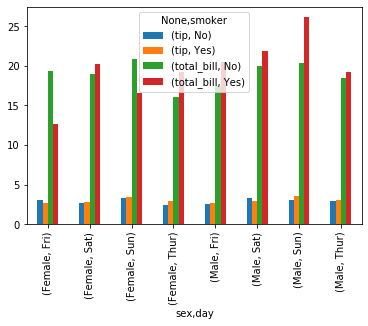

In [28]:
# tipdf.pivot_table(values, index=, columns)
'''
    index : 그룹핑 기준
    columns : 컬럼값
    values : 인덱스와 컬럼스 사이의 필드를 채우는 값
'''
tipdf.pivot_table(['total_bill','tip'], index=['sex','day'],columns='smoker').round(2).plot(kind='bar')
plt.show()

In [29]:
# tip을 알고 싶다. sex로 그룹핑, 컬럼은 흡연여부.. count, 마진
# tipdf.pivot_table('tip', index='sex',columns='smoker',aggfunc='count', margins=True)
tipdf.pivot_table('tip','sex','smoker',aggfunc='count', margins=True)


smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


## 문제 1
    - 성별에 따른 평균 팁 비율 

In [30]:
# tipdf.pivot_table('tip_pct',index='sex',aggfunc='mean')
tipdf.pivot_table('tip_pct','sex')

tipdf.groupby('sex')[['tip_pct']].mean()
tipdf.groupby('sex')['tip_pct'].agg(['mean'])

,mean
sex,
Female,0.166491
Male,0.157651


## 문제 2
    - 성별과 흡연 여부에 따른 평균 팁 비율 (pivot_table, groupby, mean, aggfuc)

In [31]:
tipdf.pivot_table(values='tip_pct',index=['sex','smoker'])
tipdf.pivot_table(values='tip_pct',index=['sex','smoker'], aggfunc='mean')

tipdf.groupby(['sex','smoker'])[['tip_pct']].mean()
tipdf.groupby(['sex','smoker'])['tip_pct'].agg(['mean'])

mean
sex    smoker          
Female No      0.156921
       Yes     0.182150
Male   No      0.160669
       Yes     0.152771

In [67]:
'''
    사용자함수 정의 
    각각의 그룹에서 가장 많은 팁과 가장 적은 팁의 차이를 알고 싶다. 
'''
def max_min_tip(x):
    return x.max() - x.min

# tipdf.groupby(by=['sex','smoker'])[['tip']].agg('mean')

In [70]:
tipdf.groupby(by=['sex','smoker'])[['tip']].agg(max_min_tip)

TypeError: <class 'method'>